___
# Ciência dos Dados - PROJETO 1

## Gabriel Lopes Monteiro   2ºC

___

## A Evolução da TV no Brasil

___
## Introdução

Em meados de 1920, se iniciou testes para a criação de um aparelho que dominou o mundo. Em 2013, cerca de 79% das casas no mundo possuíam uma televisão. Ao longo de todos esses anos, a TV passou por melhoras visuais e funcionais, como por exemplo imagens a cores e acesso a internet.
No Brasil , a televisão foi introduzida nos anos 50 pelo empresário Assis Chateaubriand. O equipamento era um objeto de luxo, com pouco acesso a população. A tradição era em uma família que obtinha o objeto na sala sentasse junto e até com vizinhos para assistir poucos canais em um tela bem pequena. Hoje , não é difícil encontrar casas com mais de uma televisão em diferentes cômodos e telas com tamanhos cada vez maiores. Uma pesquisa realizada pela FGV em 2014 mostrou que o Brasil teria uma televisão por habitante. Junto a essa estatística que se mostra um certo progresso, existe um regresso ao ver em que com todos esses avanços tecnológicos , 50% dos domicílios brasileiros possuem apenas TV de tubo (segundo o site de notícias G1) e 13 milhões possuem apenas sinal analógico aberto .
Com esse intuito, esse estudo busca entender o avanço da forma de se ver TV no Brasil nos últimos anos, em relação a posse do equipamento pelos brasileiros e a modernização do mesmo.


Referências:
História da TV :
https://www.tecmundo.com.br/projetor/2397-historia-da-televisao.htm
https://www.nyu.edu/classes/stephens/History%20of%20Television%20page.htm
Estatísticas:
http://economia.estadao.com.br/noticias/geral,brasil-tera-em-2014-uma-televisao-por-habitante-diz-fgv,182825e
http://g1.globo.com/tecnologia/noticia/2015/04/mais-de-50-de-domicilios-brasileiros-tem-apenas-tv-de-tubo-diz-ibge.html
http://economia.ig.com.br/2016-12-22/treze-milhoes-de-domicilios-no-brasil-so-tem-tv-analogica-aberta.html
http://www.nationmaster.com/country-info/stats/Media/Television-receivers/Per-capita


## Perguntas

Tema : Evolução da forma de se assistir TV no Brasil em suas diferentes regiões.

Pergunta chave: Como foi atualizada a forma de se assistir nas diferentes regiões brasileiras quanto a qualidade do sinal, modernização do aparelho e o 

Para isso , será necessário responder:

-Qual a distribuição de sinal mais presente em cada região?

-Qual a quantidade e o aparelho de TV se usa?

-Qual a relação do número de pessoas em um domicílio com o número de TV existente em cada casa para cada região?

Por fim, encontrar as diferenças do perfil entre as regiões e a evolução ao longo dos 3 anos estudados.


___
## Resultados

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [16]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\OneDrive\Documentos\Insper\2_semestre\Ciência dos Dados\Projeto1


In [38]:
# pnad2013

# Separando Região
pnad2013 = pd.read_csv("DOM2013.csv",sep = ",")
pnad2013.loc[(pnad2013.UF==11) | (pnad2013.UF==12) | (pnad2013.UF==13) | (pnad2013.UF==14) | (pnad2013.UF==15) | (pnad2013.UF==16) | (pnad2013.UF==17),"REGIAO"] = "Norte"
pnad2013.loc[(pnad2013.UF==21)|(pnad2013.UF==22)|(pnad2013.UF==23)|(pnad2013.UF==24)|(pnad2013.UF==25)|(pnad2013.UF==26)|(pnad2013.UF==27)|(pnad2013.UF==28)|(pnad2013.UF==29),"REGIAO"] = "Nordeste"
pnad2013.loc[(pnad2013.UF==31)|(pnad2013.UF==32)|(pnad2013.UF==33)|(pnad2013.UF==35),"REGIAO"] = "Sudeste"
pnad2013.loc[(pnad2013.UF==50)|(pnad2013.UF==51)|(pnad2013.UF==52)|(pnad2013.UF==53),"REGIAO"] = "Centro-Oeste" 
pnad2013.loc[(pnad2013.UF==41)|(pnad2013.UF==42)|(pnad2013.UF==43),"REGIAO"] = "Sul"

# Transformando em categoria
pnad2013.TVcor = pnad2013.V0226.astype('category')
pnad2013.TVpretoebranco = pnad2013.V0227.astype('category')
pnad2013.TVtelafina = pnad2013.V02270.astype('float')
pnad2013.TVtubo = pnad2013.V02271.astype('float')
pnad2013.TVassinatura = pnad2013.V02272.astype('category')
pnad2013.TVdigitalaberta = pnad2013.V02273.astype('category')
pnad2013.REGIAO = pnad2013.REGIAO.astype('category')
pnad2013.Componentes = pnad2013.V4620.astype('category')

# Transformando números em palavras 
pnad2013.TVpretoebranco.cat.categories = (['Sim', 'Não'])
pnad2013.TVassinatura.cat.categories = (['Sim', 'Não'])
pnad2013.TVdigitalaberta.cat.categories  = (['Sim', 'Não','Não sabe'])

# Separando as colunas de interesse
pnad2013 = pd.concat([pnad2013.TVtelafina,pnad2013.TVtubo,pnad2013.TVassinatura,pnad2013.TVdigitalaberta,pnad2013.REGIAO,pnad2013.Componentes], axis = 1)
pnad2013.columns = ['Quantidade de TV tela fina','Quantidade de TV de tubo','Possui TV por assinatura','Possui sinal de TV digital aberta','REGIÃO','Componentes']

# Tipo de sinal de TV
pnad2013.loc[(pnad2013['Possui TV por assinatura']=='Sim'),'Sinal'] = 'Por assinatura'
pnad2013.loc[(pnad2013['Possui sinal de TV digital aberta']=='Sim')&(pnad2013['Possui TV por assinatura']=='Não'),'Sinal'] = 'Digital aberta'
pnad2013.loc[(pnad2013['Possui sinal de TV digital aberta']=='Não')&(pnad2013['Possui TV por assinatura']=='Não'),'Sinal'] = 'Analógico'
pnad2013.Sinal = pnad2014.Sinal.astype('category')

#Tipo de TV
pnad2013.loc[(pnad2013['Quantidade de TV de tubo']>0)&(pnad2013['Quantidade de TV tela fina']==0),'Tipo de TV'] = 'TV de tubo'
pnad2013.loc[(pnad2013['Quantidade de TV de tubo']==0)&(pnad2013['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'TV de tela fina'
pnad2013.loc[(pnad2013['Quantidade de TV de tubo']>0)&(pnad2013['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'Ambas'
pnad2013['Tipo de TV'] = pnad2013['Tipo de TV'].astype('category')

# Criando variável TV/pessoa
pnad2013["TV por pessoa"] = ( pnad2013['Quantidade de TV de tubo']  + pnad2013['Quantidade de TV tela fina'])/pnad2013['Componentes']


# Filtragem de linha
pnad2013 = pnad2013.dropna()

# Salvando pnad2013
pnad2013.to_csv('pnad2013_projeto.csv', sep=',')




,Quantidade de TV tela fina,Quantidade de TV de tubo,Possui TV por assinatura,Possui sinal de TV digital aberta,REGIÃO,Componentes,Sinal,Tipo de TV,TV por pessoa
2,0.0,1.0,Não,Não,Norte,1.0,Por assinatura,TV de tubo,1.000000
4,0.0,2.0,Não,Não,Norte,3.0,Analógico,TV de tubo,0.666667
5,0.0,2.0,Não,Sim,Norte,2.0,Digital aberta,TV de tubo,1.000000
6,0.0,1.0,Sim,Sim,Norte,3.0,Por assinatura,TV de tubo,0.333333
7,1.0,0.0,Sim,Sim,Norte,3.0,Por assinatura,TV de tela fina,0.333333
9,1.0,0.0,Não,Não,Norte,1.0,Digital aberta,TV de tela fina,1.000000
10,1.0,2.0,Não,Sim,Norte,5.0,Por assinatura,Ambas,0.600000
11,1.0,0.0,Não,Sim,Norte,3.0,Digital aberta,TV de tela fina,0.333333
12,1.0,0.0,Não,Não,Norte,1.0,Analógico,TV de tela fina,1.000000
17,1.0,1.0,Não,Não,Norte,4.0,Analógico,Ambas,0.500000


In [39]:
# pnad2014

# Separando Região
pnad2014 = pd.read_csv("DOM2014.csv",sep = ",")

pnad2014.loc[(pnad2014.UF==11) | (pnad2014.UF==12) | (pnad2014.UF==13) | (pnad2014.UF==14) | (pnad2014.UF==15) | (pnad2014.UF==16) | (pnad2014.UF==17),"REGIAO"] = "Norte"
pnad2014.loc[(pnad2014.UF==21)|(pnad2014.UF==22)|(pnad2014.UF==23)|(pnad2014.UF==24)|(pnad2014.UF==25)|(pnad2014.UF==26)|(pnad2014.UF==27)|(pnad2014.UF==28)|(pnad2014.UF==29),"REGIAO"] = "Nordeste"
pnad2014.loc[(pnad2014.UF==31)|(pnad2014.UF==32)|(pnad2014.UF==33)|(pnad2014.UF==35),"REGIAO"] = "Sudeste"
pnad2014.loc[(pnad2014.UF==50)|(pnad2014.UF==51)|(pnad2014.UF==52)|(pnad2014.UF==53),"REGIAO"] = "Centro-Oeste" 
pnad2014.loc[(pnad2014.UF==41)|(pnad2014.UF==42)|(pnad2014.UF==43),"REGIAO"] = "Sul"

# Transformando em categoria
pnad2014.TVcor = pnad2014.V0226.astype('category')
pnad2014.TVpretoebranco = pnad2014.V0227.astype('category')
pnad2014.TVtelafina = pnad2014.V02270.astype('float')
pnad2014.TVtubo = pnad2014.V02271.astype('float')
pnad2014.TVassinatura = pnad2014.V02272.astype('category')
pnad2014.TVdigitalaberta = pnad2014.V02273.astype('category')
pnad2014.REGIAO = pnad2014.REGIAO.astype('category')
pnad2014.Componentes = pnad2014.V4620.astype('category')

# Transformando números em palavras 
pnad2014.TVpretoebranco.cat.categories = (['Sim', 'Não'])
pnad2014.TVassinatura.cat.categories = (['Sim', 'Não'])
pnad2014.TVdigitalaberta.cat.categories  = (['Sim', 'Não','Não sabe'])

# Separando as colunas de interesse
pnad2014 = pd.concat([pnad2014.TVtelafina,pnad2014.TVtubo,pnad2014.TVassinatura,pnad2014.TVdigitalaberta,pnad2014.REGIAO,pnad2014.Componentes], axis = 1)
pnad2014.columns = ['Quantidade de TV tela fina','Quantidade de TV de tubo','Possui TV por assinatura','Possui sinal de TV digital aberta','REGIÃO','Componentes']

# Tipo de sinal de TV
pnad2014.loc[(pnad2014['Possui TV por assinatura']=='Sim'),'Sinal'] = 'Por assinatura'
pnad2014.loc[(pnad2014['Possui sinal de TV digital aberta']=='Sim')&(pnad2014['Possui TV por assinatura']=='Não'),'Sinal'] = 'Digital aberta'
pnad2014.loc[(pnad2014['Possui sinal de TV digital aberta']=='Não')&(pnad2014['Possui TV por assinatura']=='Não'),'Sinal'] = 'Analógico'
pnad2014.Sinal = pnad2014.Sinal.astype('category')

#Tipo de TV
pnad2014.loc[(pnad2014['Quantidade de TV de tubo']>0)&(pnad2014['Quantidade de TV tela fina']==0),'Tipo de TV'] = 'TV de tubo'
pnad2014.loc[(pnad2014['Quantidade de TV de tubo']==0)&(pnad2014['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'TV de tela fina'
pnad2014.loc[(pnad2014['Quantidade de TV de tubo']>0)&(pnad2014['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'Ambas'
pnad2014['Tipo de TV'] = pnad2014['Tipo de TV'].astype('category')

# Criando variável TV/pessoa
pnad2014["TV por pessoa"] = ( pnad2014['Quantidade de TV de tubo']  + pnad2014['Quantidade de TV tela fina'])/pnad2014['Componentes']

# Filtragem de linha
pnad2014 = pnad2014.dropna()

# Salvando pnad2014
pnad2014.to_csv('pnad2014_projeto.csv', sep=',')
pnad2014

,Quantidade de TV tela fina,Quantidade de TV de tubo,Possui TV por assinatura,Possui sinal de TV digital aberta,REGIÃO,Componentes,Sinal,Tipo de TV,TV por pessoa
0,1.0,0.0,Não,Sim,Norte,3.0,Digital aberta,TV de tela fina,0.333333
1,1.0,0.0,Não,Sim,Norte,2.0,Digital aberta,TV de tela fina,0.500000
2,1.0,1.0,Sim,Sim,Norte,1.0,Por assinatura,Ambas,2.000000
3,5.0,0.0,Sim,Sim,Norte,5.0,Por assinatura,TV de tela fina,1.000000
4,0.0,1.0,Não,Não,Norte,4.0,Analógico,TV de tubo,0.250000
5,1.0,0.0,Não,Sim,Norte,2.0,Digital aberta,TV de tela fina,0.500000
6,2.0,1.0,Sim,Sim,Norte,5.0,Por assinatura,Ambas,0.600000
7,0.0,2.0,Sim,Não,Norte,3.0,Por assinatura,TV de tubo,0.666667
9,2.0,0.0,Não,Sim,Norte,2.0,Digital aberta,TV de tela fina,1.000000
10,2.0,1.0,Sim,Sim,Norte,5.0,Por assinatura,Ambas,0.600000


In [40]:
# pnad2015

# Separando Região
pnad2015 = pd.read_csv("DOM2015.csv",sep = ",")
pnad2015.loc[(pnad2015.UF==11) | (pnad2015.UF==12) | (pnad2015.UF==13) | (pnad2015.UF==14) | (pnad2015.UF==15) | (pnad2015.UF==16) | (pnad2015.UF==17),"REGIAO"] = "Norte"
pnad2015.loc[(pnad2015.UF==21)|(pnad2015.UF==22)|(pnad2015.UF==23)|(pnad2015.UF==24)|(pnad2015.UF==25)|(pnad2015.UF==26)|(pnad2015.UF==27)|(pnad2015.UF==28)|(pnad2015.UF==29),"REGIAO"] = "Nordeste"
pnad2015.loc[(pnad2015.UF==31)|(pnad2015.UF==32)|(pnad2015.UF==33)|(pnad2015.UF==35),"REGIAO"] = "Sudeste"
pnad2015.loc[(pnad2015.UF==50)|(pnad2015.UF==51)|(pnad2015.UF==52)|(pnad2015.UF==53),"REGIAO"] = "Centro-Oeste" 
pnad2015.loc[(pnad2015.UF==41)|(pnad2015.UF==42)|(pnad2015.UF==43),"REGIAO"] = "Sul"

# Transformando em categoria
pnad2015.TVcor = pnad2015.V0226.astype('category')
pnad2015.TVpretoebranco = pnad2015.V0227.astype('category')
pnad2015.TVtelafina = pnad2015.V02270.astype('float')
pnad2015.TVtubo = pnad2015.V02271.astype('float')
pnad2015.TVassinatura = pnad2015.V02272.astype('category')
pnad2015.TVdigitalaberta = pnad2015.V02273.astype('category')
pnad2015.REGIAO = pnad2015.REGIAO.astype('category')
pnad2015.Componentes = pnad2015.V4620.astype('category')

# Transformando números em palavras 
pnad2015.TVpretoebranco.cat.categories = (['Sim', 'Não'])
pnad2015.TVassinatura.cat.categories = (['Sim', 'Não'])
pnad2015.TVdigitalaberta.cat.categories  = (['Sim', 'Não','Não sabe'])

# Separando as colunas de interesse
pnad2015 = pd.concat([pnad2015.TVtelafina,pnad2015.TVtubo,pnad2015.TVassinatura,pnad2015.TVdigitalaberta,pnad2015.REGIAO,pnad2015.Componentes], axis = 1)
pnad2015.columns = ['Quantidade de TV tela fina','Quantidade de TV de tubo','Possui TV por assinatura','Possui sinal de TV digital aberta','REGIÃO','Componentes']

# Tipo de sinal de TV
pnad2015.loc[(pnad2015['Possui TV por assinatura']=='Sim'),'Sinal'] = 'Por assinatura'
pnad2015.loc[(pnad2015['Possui sinal de TV digital aberta']=='Sim')&(pnad2015['Possui TV por assinatura']=='Não'),'Sinal'] = 'Digital aberta'
pnad2015.loc[(pnad2015['Possui sinal de TV digital aberta']=='Não')&(pnad2015['Possui TV por assinatura']=='Não'),'Sinal'] = 'Analógico'
pnad2015.Sinal = pnad2015.Sinal.astype('category')

#Tipo de TV
pnad2015.loc[(pnad2015['Quantidade de TV de tubo']>0)&(pnad2015['Quantidade de TV tela fina']==0),'Tipo de TV'] = 'TV de tubo'
pnad2015.loc[(pnad2015['Quantidade de TV de tubo']==0)&(pnad2015['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'TV de tela fina'
pnad2015.loc[(pnad2015['Quantidade de TV de tubo']>0)&(pnad2015['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'Ambas'
pnad2015['Tipo de TV'] = pnad2015['Tipo de TV'].astype('category')

# Criando variável TV/pessoa
pnad2015["TV por pessoa"] = ( pnad2015['Quantidade de TV de tubo']  + pnad2015['Quantidade de TV tela fina'])/pnad2015['Componentes']

# Filtragem de linha
pnad2015 = pnad2015.dropna()

# Salvando pnad2015
pnad2015.to_csv('pnad2015_projeto.csv', sep=',')
pnad2015

,Quantidade de TV tela fina,Quantidade de TV de tubo,Possui TV por assinatura,Possui sinal de TV digital aberta,REGIÃO,Componentes,Sinal,Tipo de TV,TV por pessoa
0,1.0,0.0,Não,Sim,Norte,1.0,Digital aberta,TV de tela fina,1.000000
3,1.0,0.0,Não,Sim,Norte,6.0,Digital aberta,TV de tela fina,0.166667
5,0.0,2.0,Não,Sim,Norte,1.0,Digital aberta,TV de tubo,2.000000
6,0.0,1.0,Não,Sim,Norte,2.0,Digital aberta,TV de tubo,0.500000
7,0.0,1.0,Não,Sim,Norte,3.0,Digital aberta,TV de tubo,0.333333
8,1.0,0.0,Não,Sim,Norte,5.0,Digital aberta,TV de tela fina,0.200000
10,1.0,0.0,Sim,Sim,Norte,3.0,Por assinatura,TV de tela fina,0.333333
11,1.0,1.0,Não,Sim,Norte,1.0,Digital aberta,Ambas,2.000000
13,1.0,0.0,Não,Sim,Norte,2.0,Digital aberta,TV de tela fina,0.500000
15,1.0,0.0,Não,Sim,Norte,3.0,Digital aberta,TV de tela fina,0.333333


# ___
## Análises 

## Distribuição do Sinal

## Gráficos 1, 2 e 3

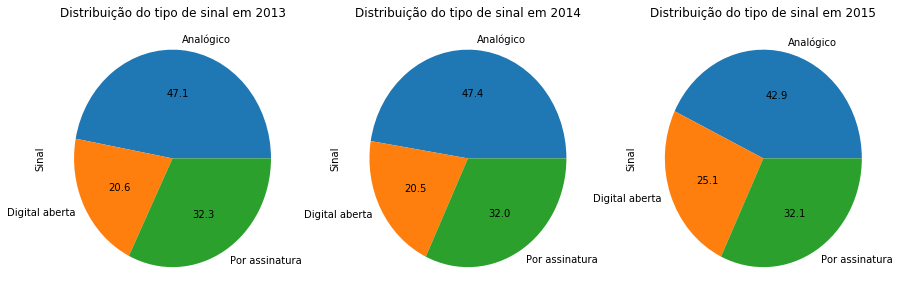

In [20]:
# Tabela univariada de frequência relativa do sinal de TV no Brasil
fr_sinal2013 = (pnad2013.Sinal.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fr_sinal2014 = (pnad2014.Sinal.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fr_sinal2015 = (pnad2015.Sinal.value_counts(sort=False, normalize=True)*100).round(decimals=1)

# Gráfico de Setor
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = fr_sinal2013.plot(kind='pie',title='Distribuição do tipo de sinal em 2013',autopct='%.1f')

plt.subplot(132)
plot = fr_sinal2014.plot(kind='pie',title='Distribuição do tipo de sinal em 2014',autopct='%.1f')

plt.subplot(133)
plot = fr_sinal2015.plot(kind='pie',title='Distribuição do tipo de sinal em 2015',autopct='%.1f')
 

## Gráficos 4, 5 e 6

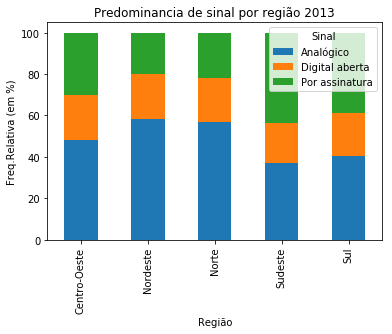

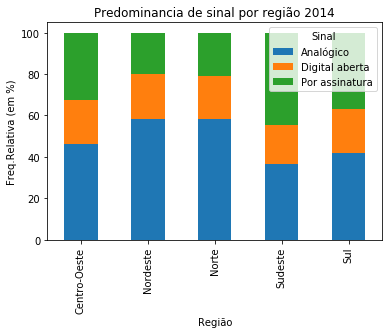

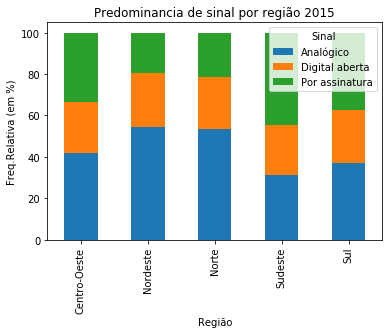

In [21]:
# Gráficos da distribuição do sinal de TV por região
sinal_regiao2013 = (pd.crosstab(pnad2013['REGIÃO'],pnad2013.Sinal,margins=True,rownames=['Região'], colnames=['Sinal'], normalize='index')*100)
plot = sinal_regiao2013.iloc[0:5,].plot(kind='bar', stacked=True,title='Predominancia de sinal por região 2013')
plt.ylabel('Freq.Relativa (em %)')

sinal_regiao2014 = (pd.crosstab(pnad2014['REGIÃO'],pnad2014.Sinal,margins=True,rownames=['Região'], colnames=['Sinal'], normalize='index')*100)
plot = sinal_regiao2014.iloc[0:5,].plot(kind='bar', stacked=True,title='Predominancia de sinal por região 2014')
plt.ylabel('Freq.Relativa (em %)')

sinal_regiao2015 = (pd.crosstab(pnad2015['REGIÃO'],pnad2015.Sinal,margins=True,rownames=['Região'], colnames=['Sinal'], normalize='index')*100)
plot = sinal_regiao2015.iloc[0:5,].plot(kind='bar', stacked=True,title='Predominancia de sinal por região 2015')
plt.ylabel('Freq.Relativa (em %)')


   Para início de análise, se foi averiguado de forma generalista, números quanto a distribuição do sinal de televisão por todo o território brasileiro, presente nos gráficos de 1 a 3. Foi encontrado uma insignificante evolução do sinal analógico e também insignificante regresso do sinal digital aberto e dos serviços de TV por assinatura nos anos de 2013 para 2014. Se na primeira passagem, as alterações foram quase inconsideráveis, dos anos 2014 para 2015 foi constatado uma clara regressão do sinal analógico em 4,5% , elevando a porção de sinal digital aberto em mesma proporção. Quanto o serviço de TV por assinatura, não foi notado variações significativas novamente.

   Em seguida à análise generalista, foi realizado uma avaliação quanto ao sinal mais específica por região nos gráficos 4,5 e 6.Pode se observar o mesmo que nos gráficos 1,2 e 3, mudanças pequenas e bem uniformes em todas as regiões do país. As regiões Norte e Nordeste em 2013 possuíam na maioria de seus domicílios o sinal analógico , com mais de 50% de suas moradias utilizando esse sinal.É interessante se constatar que essas são as regiões mais afetadas pela desigualdade social no país. Na região Centro-Oeste a situação é melhor porém não por muito. Metade dos domicílios utilizam o sinal analógico. Quanto as regiões Sudeste e Sul, que possuem a maior concentração de renda do país, o sinal analógico ocupa valores proximos a 40% assim como a TV por assinatura. Isso mostra que existem abismos sociais nessas regiões, sendo a TV digital aberta minoria. As mudanças de 2013 para 2014 e , seguidamente para 2015 não são alarmantes, mas digna de um comentário. As pequenas alterações ocorreram de migrações do sinal analógico para o sinal digital aberto. Pode-se constatar que essa mudança se trata de um aquecimento para a campanha do desligamento do sinal analógico que ja estava começando a ser comentada pela mídia.

## O equipamento televisivo

## Gráficos 7, 8 e 9

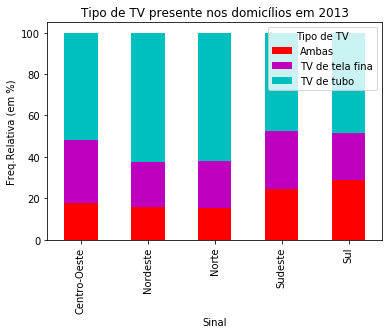

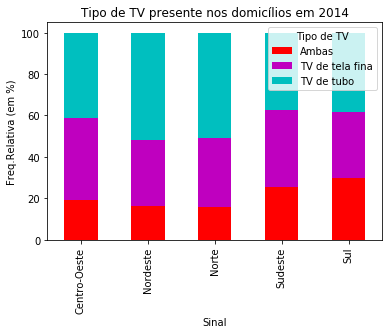

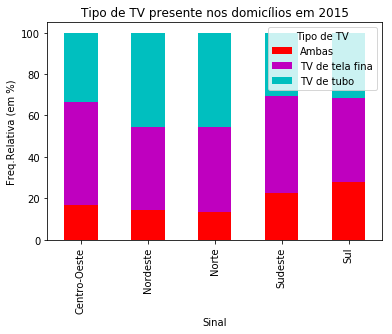

In [22]:
# Gráficos do tipo de TV predominante nos domicílios por região
my_colors = ['r', 'm','c']
TV_regiao2013 = (pd.crosstab(pnad2013['REGIÃO'],pnad2013['Tipo de TV'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_regiao2013.iloc[0:5,].plot(kind='bar', stacked=True,title='Tipo de TV presente nos domicílios em 2013', color=my_colors)
plt.ylabel('Freq.Relativa (em %)')

TV_regiao2014 = (pd.crosstab(pnad2014['REGIÃO'],pnad2014['Tipo de TV'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_regiao2014.iloc[0:5,].plot(kind='bar', stacked=True,title='Tipo de TV presente nos domicílios em 2014', color=my_colors)
plt.ylabel('Freq.Relativa (em %)')


TV_regiao2015 = (pd.crosstab(pnad2015['REGIÃO'],pnad2015['Tipo de TV'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_regiao2015.iloc[0:5,].plot(kind='bar', stacked=True,title='Tipo de TV presente nos domicílios em 2015', color=my_colors)
plt.ylabel('Freq.Relativa (em %)')



A análise realizada nos gráficos 7,8 e 9, focaram no aparelho televisivo. Como estava o acesso aos diferentes modelos e o acesso social desse bem. O cenário do país em 2013 é bem diferente do esperado. Na maioria das regiões foi a TV de tubo que dominou os domicílios participantes da pesquisa. Apenas nas regiões Sudeste e Sul, onde a população possui maior poder de compra , a TV de tubo e a TV de tela fina se equilibraram. É importante se esclarecer a opção "ambas" presente na análise, no qual permite analisar a continuação da TV de tubo em domicílios que já conseguiram adquirir uma TV de tela fina. 

O ano de 2014 é uma evolução para as regiões Centro-Oeste, Sudeste e Sul. Todas essas tiveram uma diminuição significativa de TVs de tubo na sua proporção de seus domicílios, e como consequência o aumento da proporção de TVs de tela fina. A proporção de domicílios com ambas as TVs se manteve.

Concluindo esse tópico no ano de 2015, a ascensão das TVs de tela fina se manteve em relação a 2014 em todas as regiões. Se comparado com o ano de 2013, é possível dizer que o país caminha para uma troca de papéis entre as TVs de tubo com as TVs de tela fina. Importante se dizer que a proporção ambas continua parecida nos três anos, o que dificulta uma análise de permuta entre TVs de tubo e TVs de tela fina. O brasileiro esteve com um poder aquisitivo maior nesses anos e teve a TV como um alvo de aumento de qualidade de vida.

## A proporção de TV por pessoa

## Gráficos 10, 11 e 12

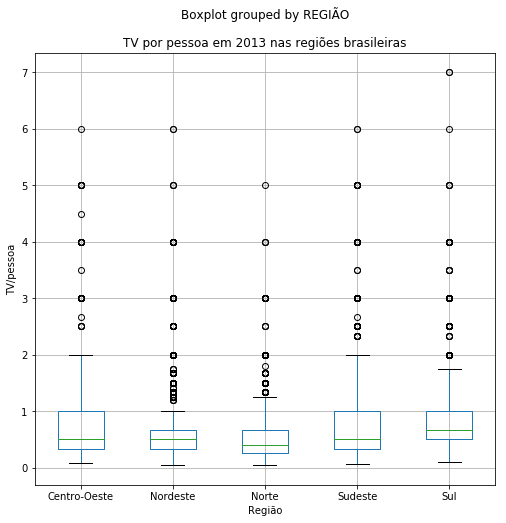

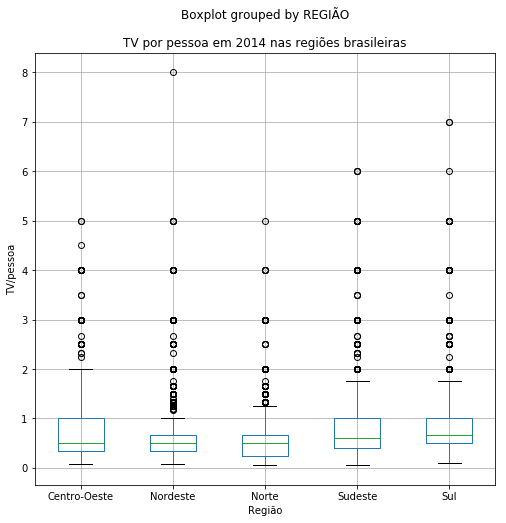

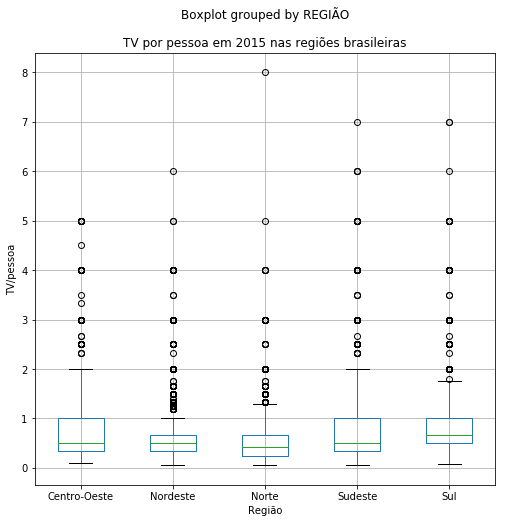

In [25]:
# Gráficos da quantidade de TV por morador , separado nas regiões

# 2013

plot =pnad2013.boxplot(column='TV por pessoa',by='REGIÃO', figsize=(8,8))
plt.ylabel('TV/pessoa')
plt.xlabel('Região')
plt.title('TV por pessoa em 2013 nas regiões brasileiras')
plt.show()

# 2014

plot =pnad2014.boxplot(column='TV por pessoa',by='REGIÃO', figsize=(8,8))
plt.ylabel('TV/pessoa')
plt.xlabel('Região')
plt.title('TV por pessoa em 2014 nas regiões brasileiras')
plt.show()

# 2015

plot =pnad2015.boxplot(column='TV por pessoa',by='REGIÃO', figsize=(8,8))
plt.ylabel('TV/pessoa')
plt.xlabel('Região')
plt.title('TV por pessoa em 2015 nas regiões brasileiras')
plt.show()

Para finalizar a investigação realizada, foi feito um boxplot do número de TVs por pessoa em um domicílio em cada região. Essa é a única análise quantitativa que resgata da introdução, o trecho em que se diz que a família se reunia na sala e até chamava os vizinhos para se assistir televisão.Obviamente, o tempo passou e hoje a televisão está presente em diversas casas, e até em diferentes cômodos destas. Como o objetivo desse projeto é entender como o brasileiro assiste televisão em suas diferentes regiões e acompanhar essa evolução, interessante analisar como nessas regiões com poder aquisitivo  e densidade demográfica diferentes se comporta o cidadão.

Iniciando a análise pelo ano de 2013, se observou uma mediana próxima de 0,5 TV pessoa. No entanto, com exceção das regiões Norte e Nordeste, se nota uma simetria positiva. Isso aponta uma diferenciação econômica que também foi observado na análise do equipamento televisivo, mostrando que 50% das maiores relações TV por pessoa estão disperças. Ainda é possível aproveitar os outliers, que existem de forma mais frequente nas regiões Norte e Nordeste, que encaram uma realidade de seus 50% maiores frequências bem inferiores as outras regiões do país.

A evolução desse cenário nos anos seguintes é bem discreta. A dispersão existente nas taxas 50% mais altas do Sudeste diminuiu no ano de 2014 e se manteve inalterada no ano de 2015.O mesmo se pode dizer da dispersão das proporções 50% mais altas do Norte, no entanto as taxas 50% mais baixas subiu em relação a 2013 para 2014.Em 2015, a dispersão das taxas nordestinas de 50% mais baixas caiu e as taxas da região adquiriram uma característica simétrica.  


# ___
## Conclusão 

Concluindo-se as análises, o projeto trouxe todas as informações necessárias para responder suas perguntas que direcionou ao principal objeto da caracterização da forma de assistir televisão em cada região brasileira ao longo dos três anos estudados. 

Começando com o aparelho como foco, o Brasil no geral se mostrou atrasado a tendências tecnológicas mundiais, porém caminhando para elas.De 2013 para 2015 o cenário se mostrou positivo para a modernização dos aparelhos dos domicílios de todas regiões, porém nas regiões Norte e Nordeste se constatou atrás nessa caminhada em relação as demais regiões. Enquanto as regiões Centro-Oeste, Sudeste e Sul já possuem porcentagens maiores de televisões de tela fina comparadas com as televisões de tubo, Norte e Nordeste estão divididos entre os dois modelos.

Quanto a proporção de televisões por pessoa dentro de um domicílio, as regiões ao longo dos 3 anos mantiveram medianas próximas e quase inalteradas. Os Estados Unidos possuíam uma média de 0,8 TVs por pessoa em 1997, enquanto no Brasil essa média passa por valores próximos a 0,6.O que mais impressiona é a dispersão dessas taxas de televisão por pessoa nas regiões mais ricas do país, que aponta para diferenças econômicas diversas numa mesma região.

O sinal televisivo foi a variável mais interessante nessa análise pois trouxe a queda do sinal analógico, ascensão do digital aberto e a quase inalteração do sinal por assinatura. Combinado com as análises acimas, foi possível entender que o país num contexto geral evolui a cada ano, mas os maiores privilégios ainda são de grupos minoritários.As regiões Norte e Nordeste continuam como as menos privilegiadas e atrás das outras regiões na evolução tecnológica. O sinal analógico continua representando o sinal predominante em metade de ambas regiões.Mesmo tendo o sinal analógico com as maiores proporções no Centro-Oeste, Sudeste e Sul, esse sinal já não representa mais do que 50% dos sinais encontrados em cada domicílio analisado.

Por fim , foi possível se traçar perfis de telespectadores de cada região do país.Nas regiões Norte e Nordeste, as regiões que possuem maior desequilíbrio econômico acabam tendo o sinal predominante analógico, metade com televisores de tubo e a outra metade com de tela fina(podendo possuir também televisores de tubo) e uma mediana de 0,6 televisões por pessoa em cada casa com uma amplitude que perto de 0 a 1,5.Importante ressaltar os outliers, que apresentam severos pontos fora dessa amplitude, mostrando o privilégio concentrado numa minoria. Nas demais regiões Centro-Oeste, Sudeste e Sul se encontra o sinal digital aberto e a sinal por assinatura com porcentagens superiores ao sinal analógico, e dentro deles o sinal por assinatura como dominante.O modelo de televisão com tela fina ja ultrapassa os números do televisor de tubo e o a mediana de televisores por moradores do domicílio é proxima dos valores do Norte e Nordeste, porém possuem uma dispersão maior em 50% das taxas mais altas, mostrando que essa taxa não é simétrica por toda a região.

Para trabalhos futuros seria interessante utilizar os dados de sinal televisivo para analisar a situação do sinal analógico no território brasileiro, focando na campanha de desligamento do sinal analógico , acompanhando sua evolução e sua influencia nos perfis de cada região do país.